# Pymaceuticals Inc.
---

Observations and findings:

This project uses matplotlib and panda to clean, analyze and visualize the drug regimen datasets of Pymaceuticals Inc, and find the best drug treatment options over time.

//Capomulin and Ramicane are clearly the best of the drug regimen options after 45 days treatment in terms of controlling or reducing tumor volume and metastatice sites.Infubinol, Ceftamin, and other treatments had no significant effect on average tumor volume.

//Our line charts and pie charts show that Capomulin and Ramicane chose more than 200 mice to be tested, a larger sample size compared with other groups. Male and female mice were chosen equally, 51% versus 49%.

//In linear regression analysis of Capomulin, the scattor plot indicates the strong positive correlation between mouse weight and the average tumor volume,  with a correlation value of 0.84 and r-squared value of 0.709,  
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df =  merge_df.loc[ merge_df["Mouse ID"] == "g989", :]
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = merge_df[merge_df["Mouse ID"]!="g989"]
clean_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_merge_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = clean_merge_df['Tumor Volume (mm3)'].groupby(clean_merge_df['Drug Regimen']).mean()
regimen_median = clean_merge_df['Tumor Volume (mm3)'].groupby(clean_merge_df['Drug Regimen']).median()
regimen_var = clean_merge_df['Tumor Volume (mm3)'].groupby(clean_merge_df['Drug Regimen']).var()
regimen_std = clean_merge_df['Tumor Volume (mm3)'].groupby(clean_merge_df['Drug Regimen']).std()
regimen_sem = clean_merge_df['Tumor Volume (mm3)'].groupby(clean_merge_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stat_df = pd.DataFrame({"Mean Tumor Volume":regimen_mean, 
                            "Median Tumor Volume":regimen_median, 
                           "Tumor Volume Variance":regimen_var, 
                           "Tumor Volume Std. Dev.":regimen_std, 
                           "Tumor Volume Std. Err.":regimen_sem})
summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggr_df=clean_merge_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_aggr_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

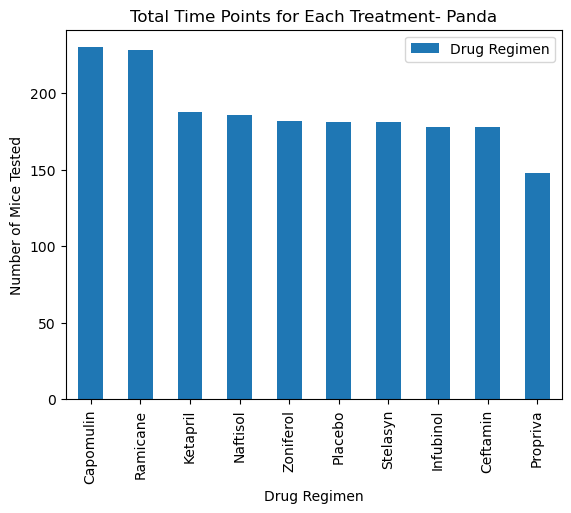

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = clean_merge_df["Drug Regimen"].value_counts()
total_timepoints_df = pd.DataFrame(total_timepoints)

total_panda_plot = total_timepoints_df.plot(kind="bar")
total_panda_plot.set_xlabel("Drug Regimen")
total_panda_plot.set_ylabel("Number of Mice Tested")
plt.title("Total Time Points for Each Treatment- Panda", fontsize = 12)

plt.show()


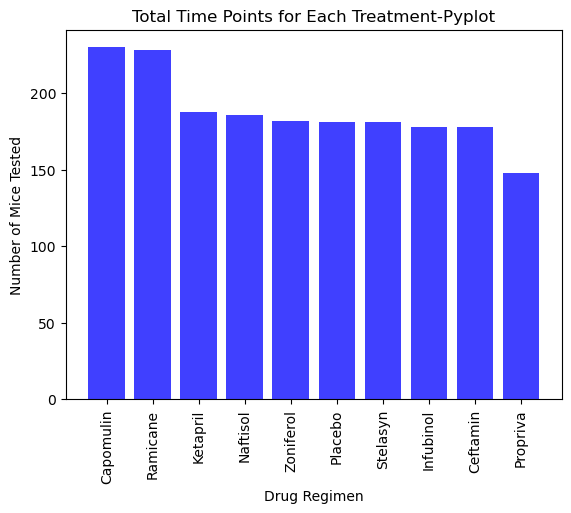

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = total_timepoints.index.values
y_axis = total_timepoints.values
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align='center')

plt.xticks(rotation="vertical")
plt.title("Total Time Points for Each Treatment-Pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


plt.show()


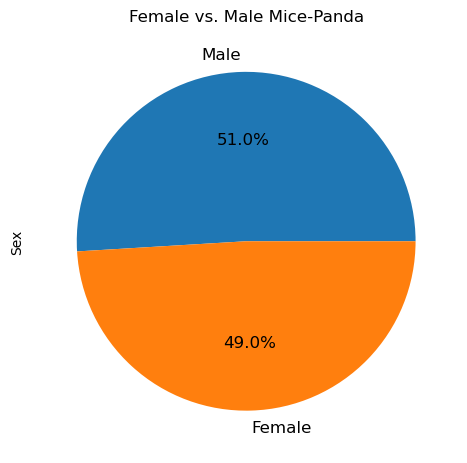

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_merge_df["Sex"].value_counts()
gender_df.plot(kind="pie",autopct= "%1.1f%%",fontsize=12,figsize=(5.5,5.5))
plt.title("Female vs. Male Mice-Panda")
plt.show()


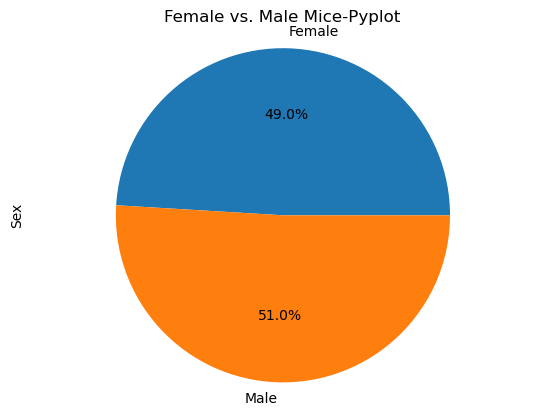

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [gender_df["Female"],gender_df["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%")
plt.title("Female vs. Male Mice-Pyplot")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint =clean_merge_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(last_timepoint_df, clean_merge_df, on = ["Mouse ID","Timepoint"])
tumor_vol_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

for i in range(len(tumor_vol_df)-1):
    if tumor_vol_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_vol_cap.append(tumor_vol_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_vol_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_vol_ram.append(tumor_vol_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_vol_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_vol_inf.append(tumor_vol_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_vol_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_vol_cef.append(tumor_vol_df.loc[i, "Tumor Volume (mm3)"])

# Put four tumor vol lists into a list for for loop        
tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]        

# Calculate the IQR and quantitatively determine if there are any potential outliers.  

outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    print(f"\n{regimen_list [i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f"Values below {lower_bound} could be potential outliers.")
    print(f"Values above {upper_bound} could be potential outliers.")
    
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
     
    for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j].round(2)
            outlier_list.append(outlier)
            print(f"The potential outliers are {outlier_list}.")


Capomulin:
The lower quartile of tumor volume is: 32.38.
The upper quartile of tumor volume is: 40.16.
The interquartile range of tumor volume is: 7.78.
The median of tumor volume is: 38.13.
Values below 20.71 could be potential outliers.
Values above 51.83 could be potential outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56.
The upper quartile of tumor volume is: 40.66.
The interquartile range of tumor volume is: 9.1.
The median of tumor volume is: 36.56.
Values below 17.91 could be potential outliers.
Values above 54.31 could be potential outliers.

Infubinol:
The lower quartile of tumor volume is: 54.05.
The upper quartile of tumor volume is: 65.53.
The interquartile range of tumor volume is: 11.48.
The median of tumor volume is: 60.17.
Values below 36.83 could be potential outliers.
Values above 82.75 could be potential outliers.
The potential outliers are [36.32].

Ceftamin:
The lower quartile of tumor volume is: 48.72.
The upper quartile of tumor volume is: 64.3.

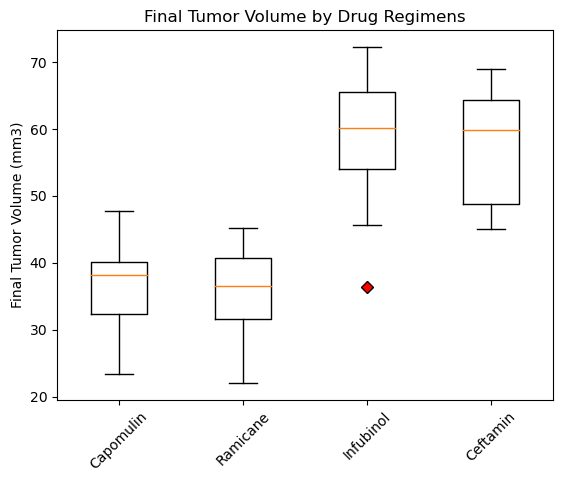

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

red_dot = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("Final Tumor Volume by Drug Regimens", fontsize = 12)
ax1.boxplot(tumor_vol, flierprops = red_dot)
ax1.set_xticklabels(regimen_list,rotation=45)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Cap_line_df =clean_merge_df.loc[clean_merge_df["Drug Regimen"]=="Capomulin",:]
Cap_line_df.head()

#pick mice ID S185
Cap_s185_df =clean_merge_df.loc[clean_merge_df["Mouse ID"] == "s185",:]
Cap_s185_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


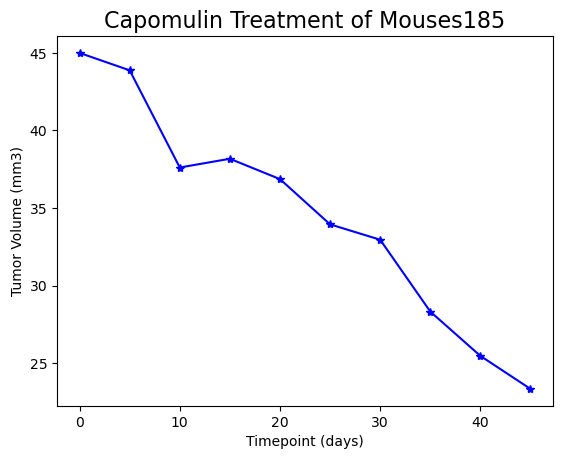

In [17]:
#plot the chart for Capomulin treatment of mouse g185

plt.plot(Cap_s185_df["Timepoint"],Cap_s185_df["Tumor Volume (mm3)"],marker= "*", color = "blue")
plt.title("Capomulin Treatment of Mouses185", fontsize = 16)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

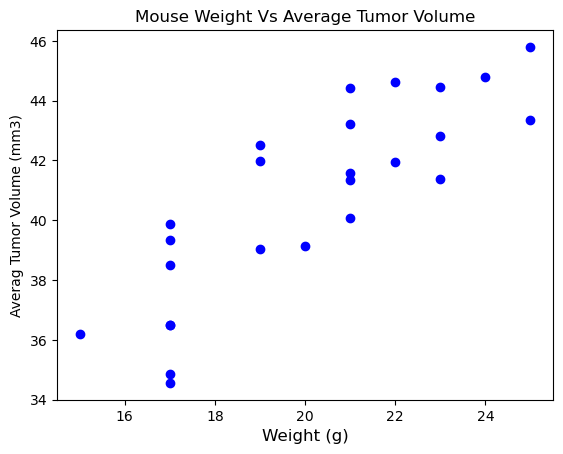

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_cap_vol =Cap_line_df.groupby(["Mouse ID"]).mean()

marker_size=15
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Vs Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The correlation is: 0.84
The r-squared is: 0.709


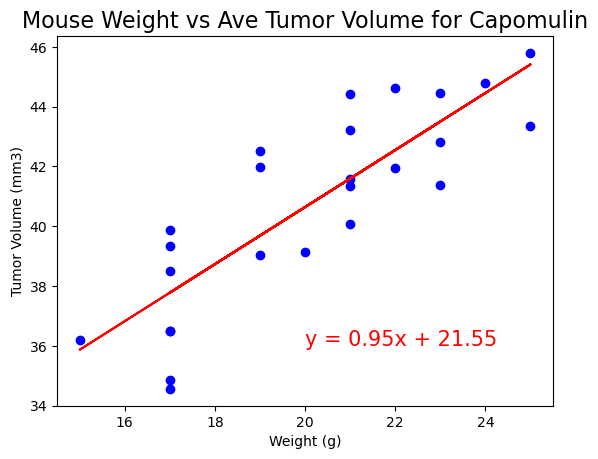

In [20]:
# for mouse weight and average tumor volume for the Capomulin regimen

#scatter plot for the dataset
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'], color="blue")
(slope, intercept, rvalue, pvalue, stderr) =linregress(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])

# Add the linear regression equation and line to plot
regress_values= avg_cap_vol['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(avg_cap_vol['Weight (g)'],regress_values,"r-")
print(f"The correlation is: {round(correlation[0],2)}")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Ave Tumor Volume for Capomulin", fontsize=16)
plt.show()